In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df = df.drop('CustomerID',axis=1)
df.columns = ['Gender', 'Age', 'Income', 'Score']
df

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Check Null values in data (if any..)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
df.isnull().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

## EDA #trying to find out some patterns in dataset

Differences in Age, Income and Score by gender.

C:\Users\satis\AppData\Local\Temp\ipykernel_20764\2767146672.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df.Gender, y = df.Age, data=df,palette={'Male': 'lightblue', 'Female': 'orange'})
C:\Users\satis\AppData\Local\Temp\ipykernel_20764\2767146672.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df.Gender, y = df.Income, data=df,palette={'Male': 'lightblue', 'Female': 'orange'})
C:\Users\satis\AppData\Local\Temp\ipykernel_20764\2767146672.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df.Gender, y = df.Score, dat

<function matplotlib.pyplot.show(close=None, block=None)>

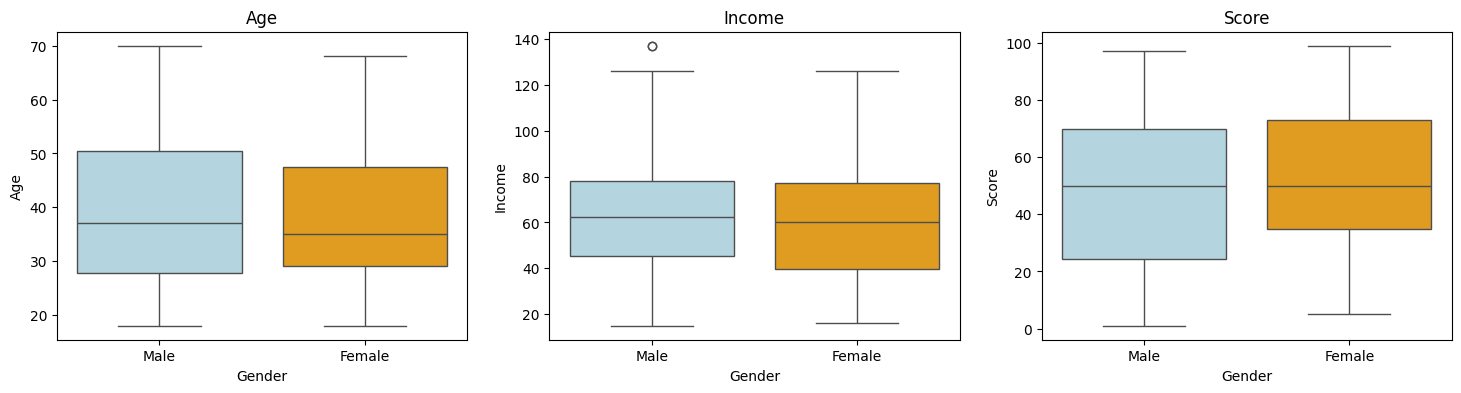

In [7]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.boxplot(x = df.Gender, y = df.Age, data=df,palette={'Male': 'lightblue', 'Female': 'orange'})
plt.title("Age")

plt.subplot(1,3,2)
sns.boxplot(x = df.Gender, y = df.Income, data=df,palette={'Male': 'lightblue', 'Female': 'orange'})
plt.title("Income")

plt.subplot(1,3,3)
sns.boxplot(x = df.Gender, y = df.Score, data=df,palette={'Male': 'lightblue', 'Female': 'orange'})
plt.title("Score")

plt.show

There is no significant difference or finding except that Female seems to have higher bound for lower score (first quartile).

C:\Users\satis\AppData\Local\Temp\ipykernel_20764\3519953650.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


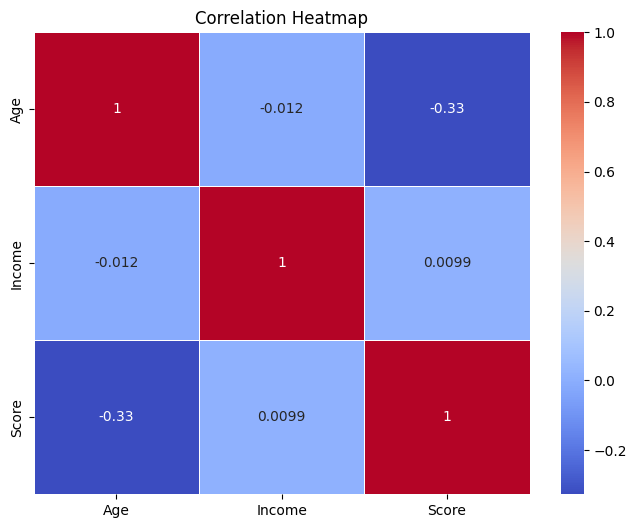

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


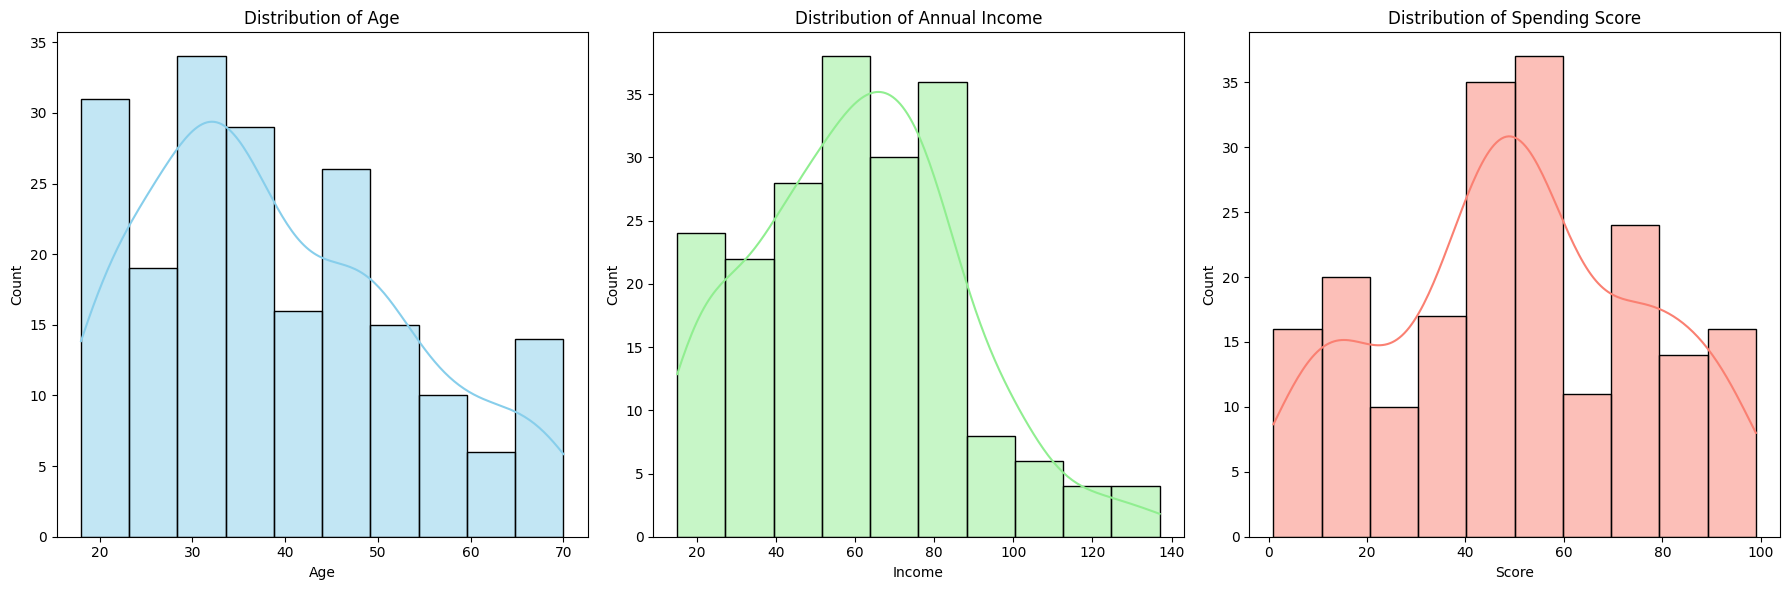

In [9]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['Income'], kde=True, bins=10, color='lightgreen')
plt.title('Distribution of Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(df['Score'], kde=True, bins=10, color='salmon')
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()


Age Influence: Since the dataset is skewed towards younger individuals, the spending patterns might be more reflective of this demographic.

Income Influence: The narrow income range suggests that spending differences are likely driven by factors other than large variations in income, such as personal preferences or lifestyle choices.

Spending Behavior: The varied spending score distribution indicates diverse spending habits, which can be further analyzed by looking at relationships between spending scores and other factors like age and income.

## Income & Score by Age

C:\Users\satis\AppData\Local\Temp\ipykernel_20764\1086297807.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x=df.Age, y=df.Income, hue=df.Gender, ci=0)
C:\Users\satis\AppData\Local\Temp\ipykernel_20764\1086297807.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x=df.Age, y=df.Score, hue=df.Gender, ci=0)


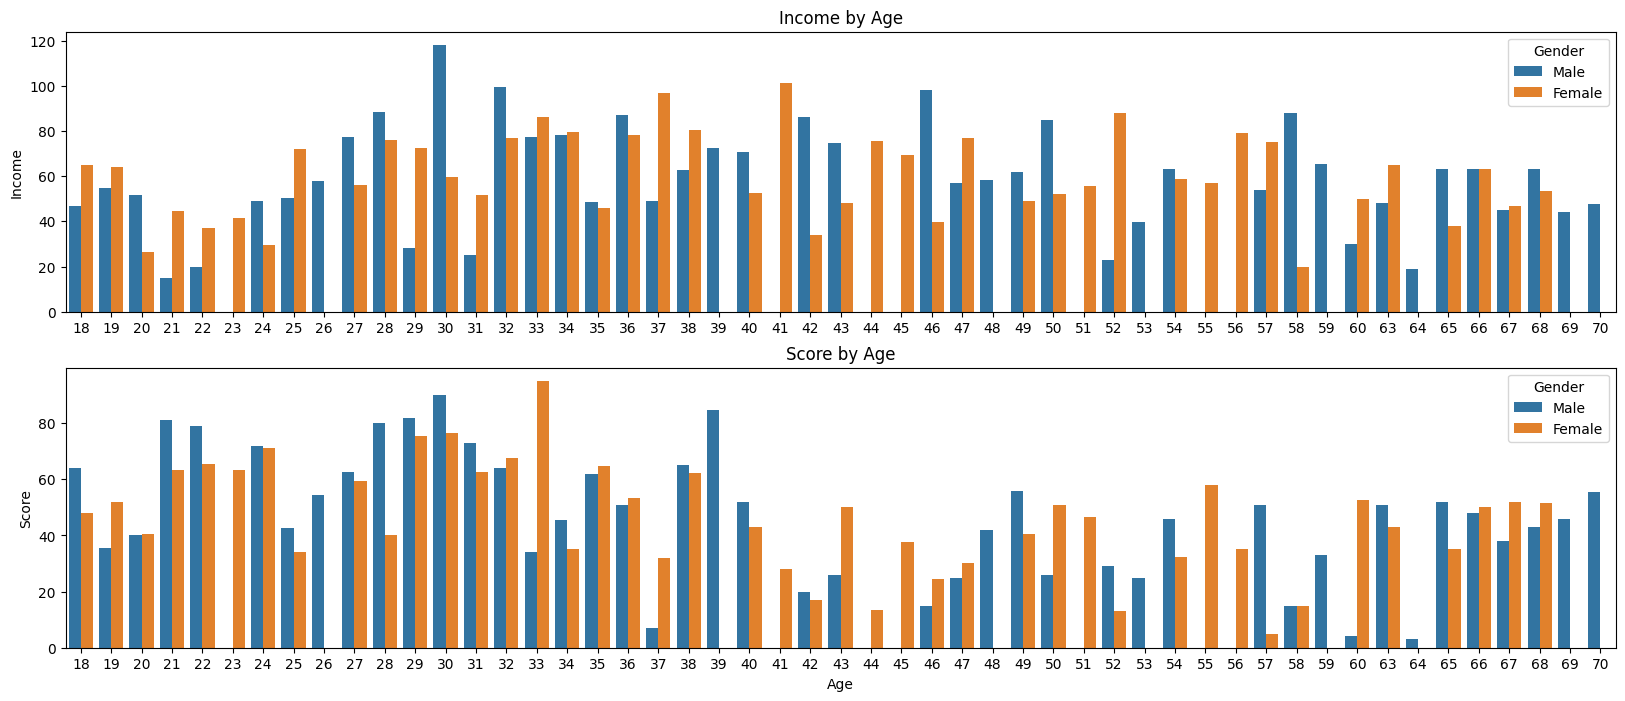

In [10]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
sns.barplot(x=df.Age, y=df.Income, hue=df.Gender, ci=0)
plt.title('Income by Age')
plt.xlabel('')

plt.subplot(2,1,2)
sns.barplot(x=df.Age, y=df.Score, hue=df.Gender, ci=0)
plt.title('Score by Age')

plt.show()

income seems to be highest for age group 25-50 comparing to others and similary, score is higer for group of people in age 20-40 comparing to others.

## Data preparation

In [11]:
#Gender column will be encoded into 0/1 values
LE = LabelEncoder()
df['Gender'] = LE.fit_transform(df['Gender'])

In [12]:
# create new dataframe with transformed values
ndf = df.copy()

ss = StandardScaler()
ndf['Age'] = ss.fit_transform(df['Age'].values.reshape(-1,1))
ndf['Income'] = ss.fit_transform(df['Income'].values.reshape(-1,1))
ndf['Score'] = ss.fit_transform(df['Score'].values.reshape(-1,1))

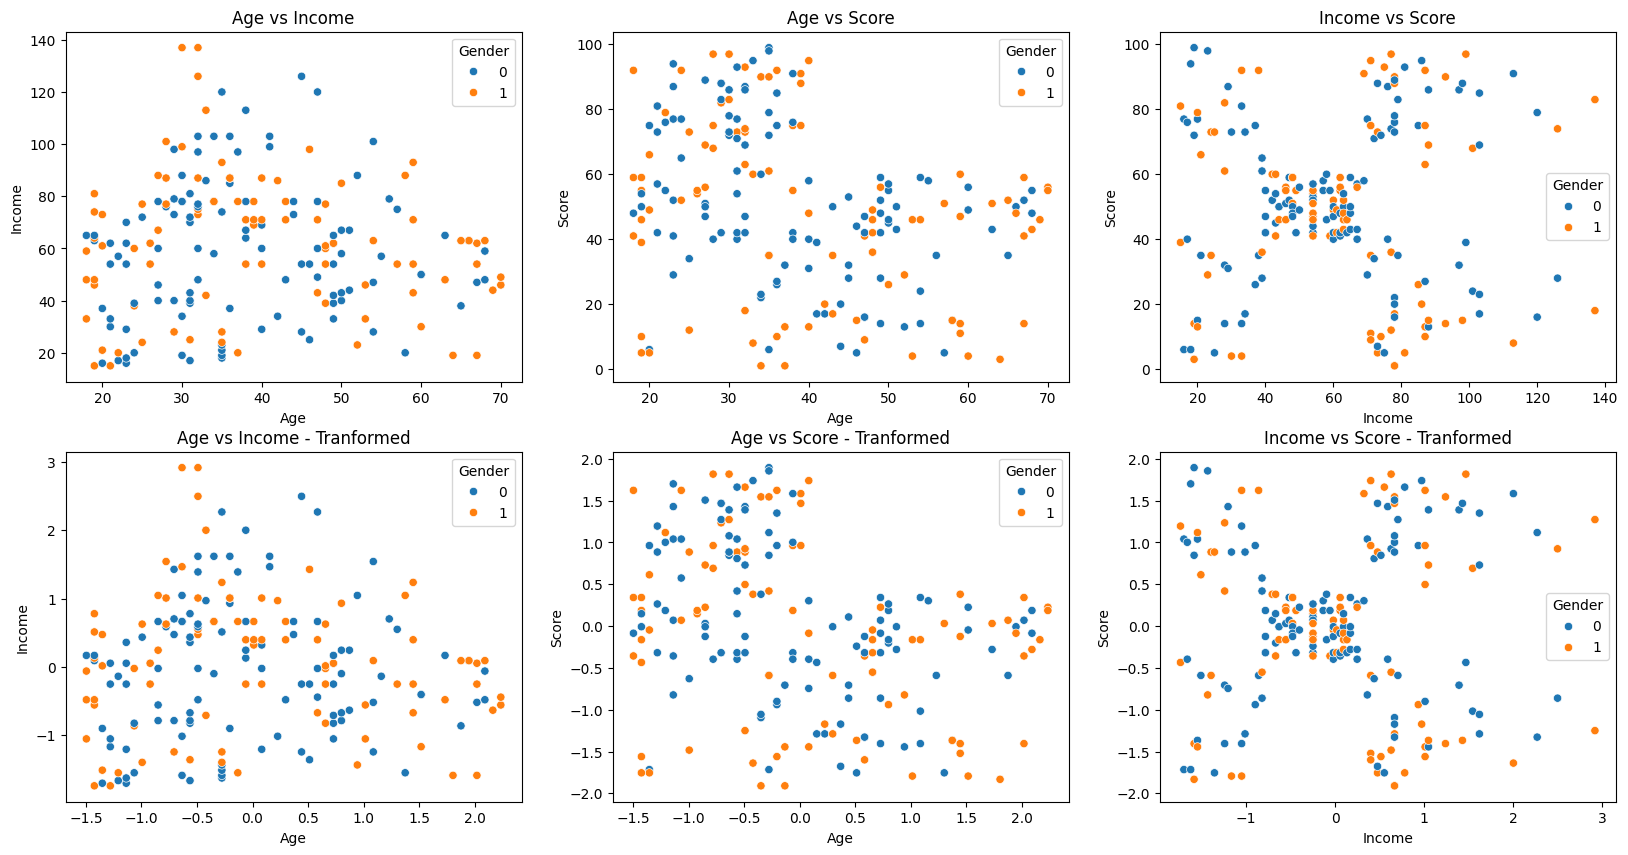

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.scatterplot(x=df.Age, y=df.Income, hue=df.Gender)
plt.title('Age vs Income')

plt.subplot(2,3,2)
sns.scatterplot(x=df.Age, y=df.Score, hue=df.Gender)
plt.title('Age vs Score')

plt.subplot(2,3,3)
sns.scatterplot(x=df.Income, y=df.Score, hue=df.Gender)
plt.title('Income vs Score')

plt.subplot(2,3,4)
sns.scatterplot(x=ndf.Age, y=ndf.Income, hue=ndf.Gender)
plt.title('Age vs Income - Tranformed')

plt.subplot(2,3,5)
sns.scatterplot(x=ndf.Age, y=ndf.Score, hue=ndf.Gender)
plt.title('Age vs Score - Tranformed')

plt.subplot(2,3,6)
sns.scatterplot(x=ndf.Income, y=ndf.Score, hue=ndf  .Gender)
plt.title('Income vs Score - Tranformed')

plt.show()


## Relation between variables

There is significant relation between variables, income increase with age or score decrease with age.

## Clustering using KMeans

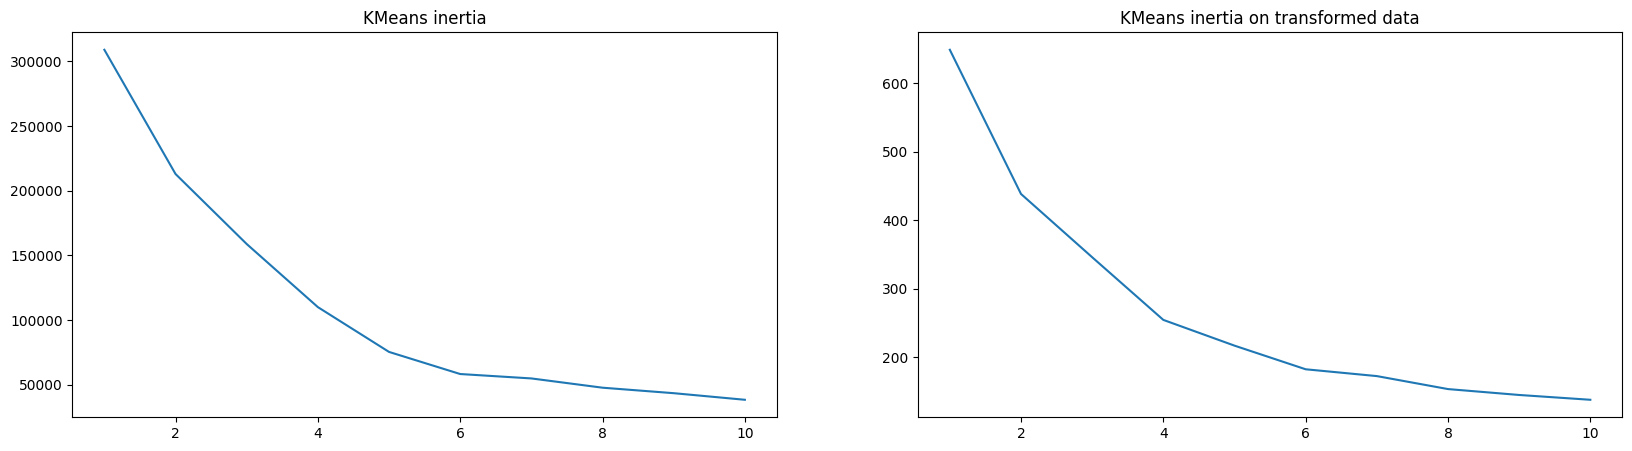

In [16]:
# Untransformed Data

inertia = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i).fit(df)
    inertia.append(kmean.inertia_)
    
    
# Transformed Data

inertia_n = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i).fit(ndf)
    inertia_n.append(kmean.inertia_)
    
    
# Plots

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=range(1,11), y=inertia)
plt.title('KMeans inertia')

plt.subplot(1,2,2)
sns.lineplot(x=range(1,11), y=inertia_n)
plt.title('KMeans inertia on transformed data')

plt.show()

We draw inertia of KMeans on raw as well as normalized data, just to see if it makes any difference

In [20]:
clusters = [2,3,4,5]
cluster_centers = {}
for c in clusters:
    km = KMeans(n_clusters=c).fit(df[['Age', 'Income', 'Score', 'Gender']])
    df['cluster' + str(c)] = km.labels_
    cluster_centers[str(c)] = km.cluster_centers_

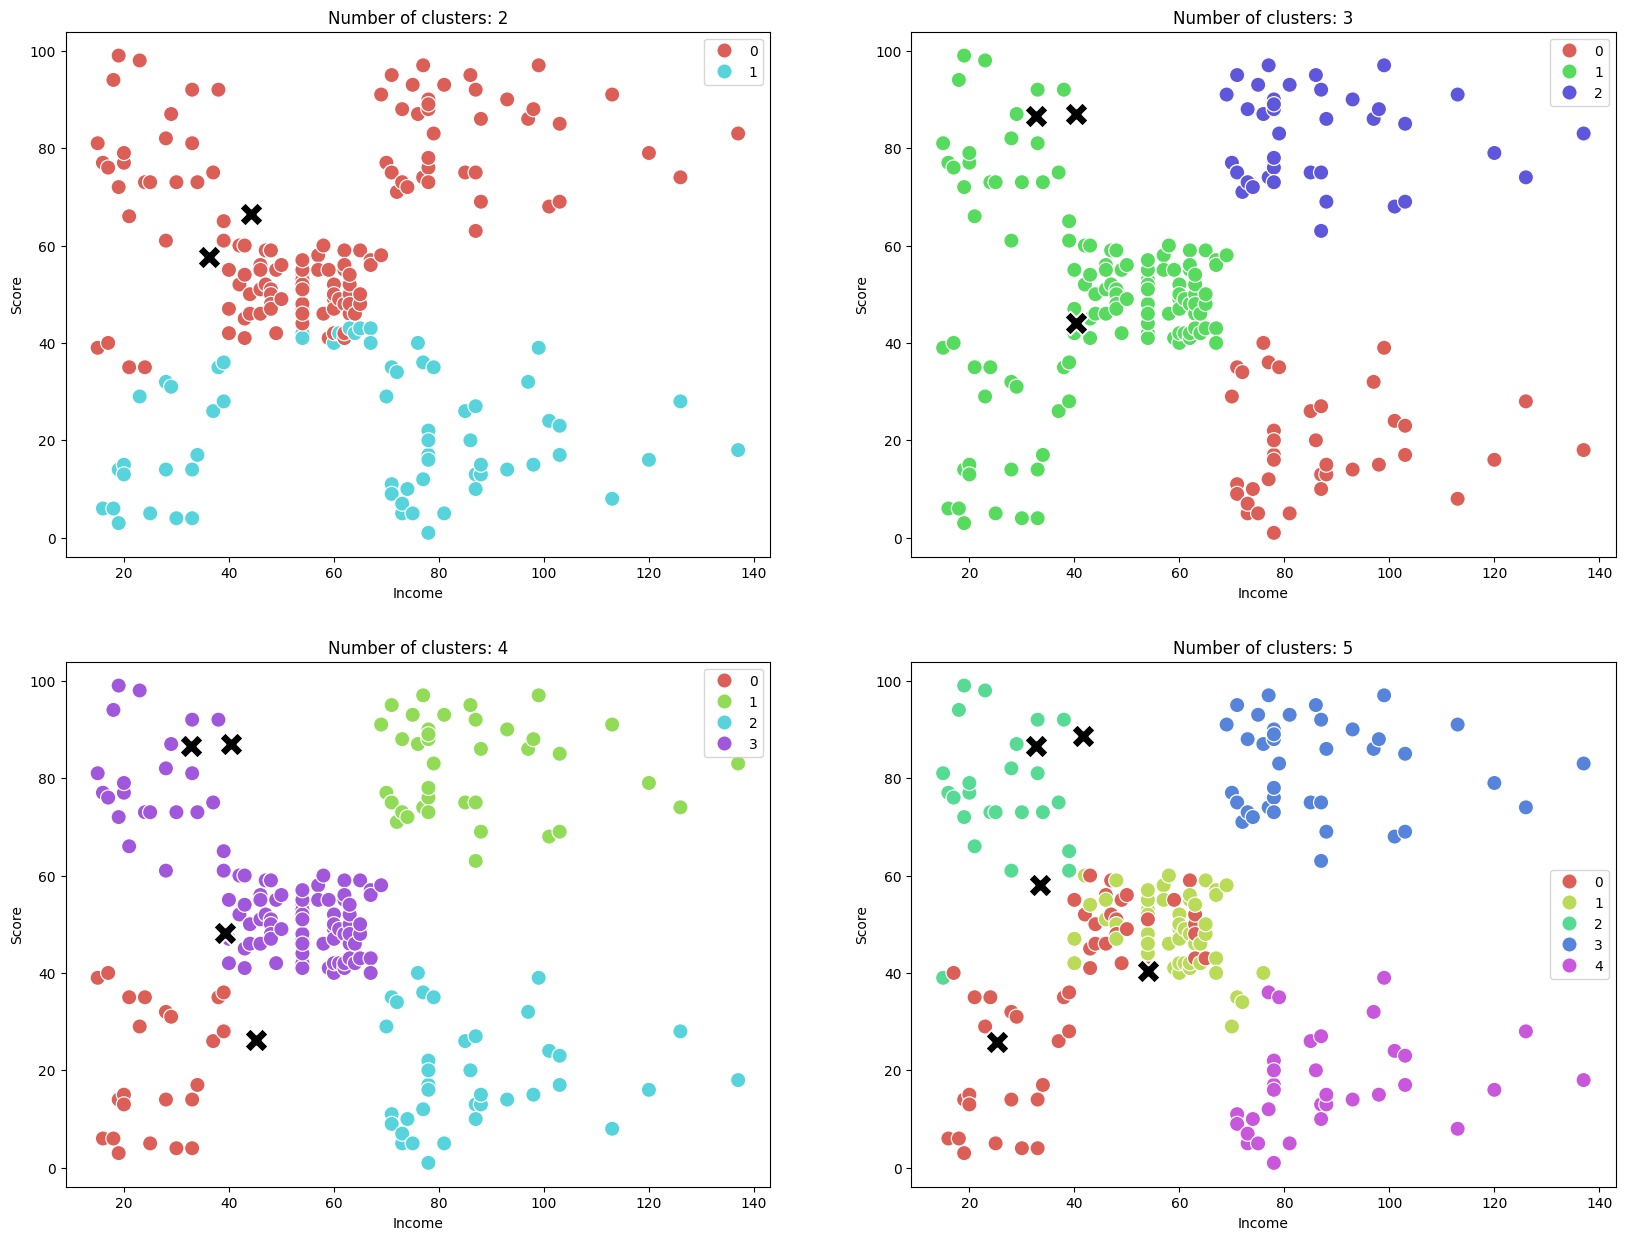

In [28]:
plt.figure(figsize=(20,15))
for i, c in enumerate(clusters):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df.Income, y=df.Score, hue=df['cluster' + str(c)], s=120, palette=sns.color_palette('hls', c))
    #sns.scatterplot(x=cluster_centers[str(c)][:,1], y=cluster_centers[str(c)][:,2], color = 'clack', s=300)
    sns.scatterplot(x=cluster_centers[str(c)][:,0], y=cluster_centers[str(c)][:,1], color='black', s=300, marker='X')
    plt.title('Number of clusters: ' + str(c))
    
plt.show()